# Introduction

Gen-Z is entering the housing market at a time with high prices, high interest rates, and overall lower household income than previous generations. These factors are currently making affording a home particularly difficult.

This raises the question on if current housing affordability is at an all-time low or if previous generations have experienced the same struggle in the past.

To provide insight into this matter, this analysis investigates how housing affordability has changed over time using Zillow's New Homeowner Affordability dataset. The New Homeowner Affordability dataset provides data on how housing affordability has changed over time across statistical metro areas (sma) by comparing household income to housing prices. Specifically, Zillow's New Homeowner Affordability metric is defined as a measure of the share of income the median household would spend on a newly purchased home, including its mortgage payment, homeowner’s insurance, property taxes, and maintenance costs. Typically, spending more than 30% of income on housing is considered unaffordable.

Link: [New Homeowner Affordability Data](https://files.zillowstatic.com/research/public_csvs/new_homeowner_affordability/Metro_new_homeowner_affordability_downpayment_0.20_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv?t=1762503473)

***

# Data Exploration

#### Import libraries and data

In [3]:
# import libraries needed for analysis
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from IPython.display import HTML, display

# import raw data by loading in csv file from url
url = 'https://files.zillowstatic.com/research/public_csvs/new_homeowner_affordability/Metro_new_homeowner_affordability_downpayment_0.20_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv?t=1762503473'
data = pd.read_csv(url)

#### Summary statistics and missing value information

In [4]:
# create function to gather column summary information
def dataframe_summary(df: pd.DataFrame) -> pd.DataFrame:
    """
    Summarize DataFrame columns with detailed statistics.

    Returns a DataFrame with:
      - column name
      - data type
      - null count
      - null percent
      - unique value count
      - top 3 values with their associated percentages
    """
    summary = []

    for col in df.columns:
        data = df[col]
        total = len(data)
        null_count = data.isnull().sum()
        null_percent = (null_count / total) * 100 if total > 0 else 0
        unique_count = data.nunique(dropna=True)

        # Get top 3 values and their percentages
        value_counts = data.value_counts(dropna=True, normalize=True).head(3)
        top_values = [
            f"{idx} ({round(pct * 100, 2)}%)"
            for idx, pct in value_counts.items()
        ]
        top_values_str = ",\\n".join(top_values)

        summary.append({
            "Column": col,
            "Dtype": data.dtype,
            "Null Count": null_count,
            "Null %": round(null_percent, 2),
            "Unique Values": unique_count,
            "Top 3 Values (with %)": top_values_str
        })

    return pd.DataFrame(summary)


# display column summary statistics using HTML.
# Outputting the dataframe as an HTML table allows for a more user-friendly view of the results with line breaks
data_summ = dataframe_summary(data)
display(HTML(data_summ.to_html().replace("\\n","<br>")))

,Column,Dtype,Null Count,Null %,Unique Values,Top 3 Values (with %)
0,RegionID,int64,0,0.00,390,"102001 (0.26%),394913 (0.26%),753899 (0.26%)"
1,SizeRank,int64,0,0.00,388,"361 (0.51%),255 (0.51%),437 (0.26%)"
2,RegionName,object,0,0.00,390,"United States (0.26%),New York, NY (0.26%),Los Angeles, CA (0.26%)"
3,RegionType,object,0,0.00,2,"msa (99.74%),country (0.26%)"
4,StateName,object,1,0.26,50,"CA (6.68%),TX (6.68%),FL (5.66%)"
5,2012-01-31,float64,5,1.28,385,"0.2209442238484996 (0.26%),0.4417247000060834 (0.26%),0.4002891629636065 (0.26%)"
6,2012-02-29,float64,5,1.28,385,"0.220113256781445 (0.26%),0.4395756767619825 (0.26%),0.3970115163910012 (0.26%)"
7,2012-03-31,float64,5,1.28,385,"0.2211656422915102 (0.26%),0.4409206855378491 (0.26%),0.3961147431316781 (0.26%)"
8,2012-04-30,float64,5,1.28,385,"0.2205391029007765 (0.26%),0.4394623559254321 (0.26%),0.3916523935984528 (0.26%)"
9,2012-05-31,float64,5,1.28,385,"0.218859376073098 (0.26%),0.436274415108785 (0.26%),0.3860663461203316 (0.26%)"


In [5]:
# output statistical summary of raw data
data.describe()

,RegionID,SizeRank,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,...,2024-12-31,2025-01-31,2025-02-28,2025-03-31,2025-04-30,2025-05-31,2025-06-30,2025-07-31,2025-08-31,2025-09-30
count,390.000000,390.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,...,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,402309.961538,207.328205,0.218550,0.217664,0.218692,0.218028,0.216370,0.214687,0.213046,0.214131,...,0.354979,0.361858,0.358537,0.352142,0.352590,0.353380,0.351749,0.347773,0.342976,0.335831
std,56101.209509,127.977524,0.062366,0.061814,0.061641,0.061238,0.060699,0.060212,0.059734,0.059991,...,0.103857,0.105596,0.103898,0.101256,0.101077,0.100906,0.099885,0.098018,0.096035,0.093528
min,102001.000000,0.000000,0.079109,0.079392,0.080767,0.081498,0.081944,0.082470,0.082862,0.083774,...,0.183680,0.187100,0.185669,0.182517,0.181911,0.182150,0.180957,0.179483,0.176962,0.173264
25%,394539.750000,100.250000,0.181638,0.179986,0.180976,0.181067,0.180008,0.178332,0.177661,0.178514,...,0.282309,0.287221,0.284886,0.280172,0.280489,0.281425,0.280834,0.278353,0.275994,0.271647
50%,394772.500000,199.500000,0.206956,0.206193,0.206566,0.205992,0.205037,0.203071,0.201747,0.203786,...,0.334549,0.341195,0.338295,0.332411,0.332623,0.333601,0.332940,0.329780,0.325663,0.319176
75%,395032.500000,306.750000,0.241396,0.240272,0.240962,0.240404,0.238893,0.238092,0.237207,0.237811,...,0.397587,0.405388,0.401594,0.394430,0.395296,0.396637,0.395647,0.391470,0.384655,0.375779
max,753924.000000,552.000000,0.663767,0.656714,0.651465,0.646829,0.644820,0.644811,0.644994,0.646160,...,0.865067,0.877986,0.864766,0.843691,0.840974,0.837138,0.824974,0.806555,0.787568,0.764333


***

# Data Wrangling

In [6]:
# create copy of raw data to use for data wrangling
df = data.copy()

#### Update column names

In [7]:
# update column names to be snake case
df.columns = [i.lower().replace(' ', '_') for i in df.columns]

#### Pivot data from wide to long
Pivoting the data helps to tidy/prep the data for analysis and creating visualizations

In [8]:
# pivot data from wide to long so every metro area has a row and affordability metric for each year-month (date)
df = df.melt(
    id_vars=df.columns[:5],
    value_vars=df.columns[5:],
    var_name='date',
    value_name='affordability'
    )

# reoutput column summary statistics using HTML with pivoted data
display(HTML(dataframe_summary(df).to_html().replace("\\n","<br>")))

,Column,Dtype,Null Count,Null %,Unique Values,Top 3 Values (with %)
0,regionid,int64,0,0.00,390,"102001 (0.26%),394913 (0.26%),753899 (0.26%)"
1,sizerank,int64,0,0.00,388,"361 (0.51%),255 (0.51%),437 (0.26%)"
2,regionname,object,0,0.00,390,"United States (0.26%),New York, NY (0.26%),Los Angeles, CA (0.26%)"
3,regiontype,object,0,0.00,2,"msa (99.74%),country (0.26%)"
4,statename,object,165,0.26,50,"CA (6.68%),TX (6.68%),FL (5.66%)"
5,date,object,0,0.00,165,"2012-01-31 (0.61%),2012-02-29 (0.61%),2012-03-31 (0.61%)"
6,affordability,float64,194,0.30,64156,"0.2209442238484996 (0.0%),0.4417247000060834 (0.0%),0.4002891629636065 (0.0%)"


#### Update columns

In [9]:
# transform the date column to a date data type
df['date'] = pd.to_datetime(df['date'])
# multiple the housing affordability column by 100 to represent a percentage
df['affordability'] = df['affordability'] * 100

#### Subset data

In [10]:
# create subset dataframe with US housing affordability data
df_us = df[df['statename'].isna()]
# create subset dataframe with metro area housing affordability data
df_state = df[df['statename'].notna()]

#### Remove missing values
Missing housing affordability values are removed. This decision was made due to missing values only accounting for 0.3% of the dataset. In addition, filling the missing values with 0 would skew analysis results and filling (back/forward filling) the data would lead to inaccurate results due to this being an analysis investigating chnages over time.

In [11]:
# remove metro area rows with missing affordability data
df_state = df_state[df_state['affordability'].notna()]

#### Create state region column

In [12]:
# create dictionary to map state abbreviations to US state regions
region_mapping = {
    'AL': 'South', 'AK': 'West', 'AZ': 'West', 'AR': 'South', 'CA': 'West',
    'CO': 'West', 'CT': 'Northeast', 'DE': 'South', 'FL': 'South',
    'GA': 'South', 'HI': 'West', 'ID': 'West', 'IL': 'Midwest',
    'IN': 'Midwest', 'IA': 'Midwest', 'KS': 'Midwest', 'KY': 'South',
    'LA': 'South', 'ME': 'Northeast', 'MD': 'South', 'MA': 'Northeast',
    'MI': 'Midwest', 'MN': 'Midwest', 'MS': 'South', 'MO': 'Midwest',
    'MT': 'West', 'NE': 'Midwest', 'NV': 'West', 'NH': 'Northeast',
    'NJ': 'Northeast', 'NM': 'West', 'NY': 'Northeast', 'NC': 'South',
    'ND': 'Midwest', 'OH': 'Midwest', 'OK': 'South', 'OR': 'West',
    'PA': 'Northeast', 'RI': 'Northeast', 'SC': 'South', 'SD': 'Midwest',
    'TN': 'South', 'TX': 'South', 'UT': 'West', 'VT': 'Northeast',
    'VA': 'South', 'WA': 'West', 'WV': 'South', 'WI': 'Midwest', 'WY': 'West'
}
# create state region column by mapping the state region dictionary
# this column is used for analyzing/visualizing the housing affordability at the regional level 
df_state['stateregion'] = df_state['statename'].map(region_mapping)

#### Aggregate data - date & region

In [13]:
# create aggregated dataframe that calculates the median affordability rate per region and date
region_aff_df = df_state.groupby(['stateregion', 'date']).agg(
    region_affordability_med=('affordability', 'median'),
).unstack('stateregion')

display(region_aff_df.head())

region_affordability_med                                 
stateregion                  Midwest  Northeast      South       West
date                                                                 
2012-01-31                 17.912862  24.021538  20.386661  23.701384
2012-02-29                 17.814205  23.960794  20.305912  23.667609
2012-03-31                 17.958521  24.094201  20.352816  23.836366
2012-04-30                 17.870537  24.039173  20.325031  23.889544
2012-05-31                 17.747840  23.837957  20.175294  23.700428

#### Aggregate data - average year over year percent change for the top five worst and best affordable metro areas in the last five years  

In [14]:
# create subset dataframe filtered down to the last five years
df_state_five_yrs = df_state[df_state['date'] >= '2020-09-01']

# create aggregated dataframe with the median affordability percent per metro area
# this dataframe is used to identify the five metro areas with the best and worst median affordability
sma_aff_df = df_state_five_yrs.groupby(['regionname']).agg(
    sma_affordability_med=('affordability', 'median'),
).reset_index()

# filter dataframe to the top 5 metro areas with the highest median share of income percent within the last five years
top_smas = sma_aff_df.sort_values('sma_affordability_med').tail(5)
top_sma_date_aff_df = df_state_five_yrs[df_state_five_yrs['regionname'].isin(
    top_smas['regionname'])][['regionname', 'date', 'affordability']]


# filter dataframe to the top 5 metro areas with the lowest median share of income percent within the last five years
low_smas = sma_aff_df.sort_values('sma_affordability_med').head(5)
low_sma_date_aff_df = df_state_five_yrs[df_state_five_yrs['regionname'].isin(
    low_smas['regionname'])][['regionname', 'date', 'affordability']]


# create column that categorizes the metro areas based on if they have one of the best or worst housing affordability
top_sma_date_aff_df['category'] = 'Worst'
low_sma_date_aff_df['category'] = 'Best'
# create dataframe with both the best and the worst metro area affordability rates within the last 5 years
top_low_sma_date_aff_df = pd.concat([top_sma_date_aff_df, low_sma_date_aff_df])
top_low_sma_date_aff_df = top_low_sma_date_aff_df.sort_values(
    ['regionname', 'date'])
# create column that calculates the yearly percent changes for each metro area
top_low_sma_date_aff_df['yoy_diff'] = top_low_sma_date_aff_df.groupby(
    'regionname')['affordability'].pct_change(12)
# index data to create desired visualization
top_low_sma_date_aff_df['yoy_diff'] = top_low_sma_date_aff_df['yoy_diff'] * 100


# aggregate data to get the average year over year percent change in affordability by date and best/worst classification 
top_low_yoy_avg = top_low_sma_date_aff_df.groupby([
    'date', 'category'])['yoy_diff'].mean().reset_index()
# remove average percent changes that are null due to being within the earliest year of the subset data
#   (there cannot be a percent change fot these values due to there being no prior data to compare to) 
top_low_yoy_avg = top_low_yoy_avg[top_low_yoy_avg['yoy_diff'].notna()] \
    .sort_values('date')

In [15]:
# display most unaffordable metro areas
display(top_smas)

,regionname,sma_affordability_med
311,"San Jose, CA",68.792189
212,"Los Angeles, CA",71.174091
316,"Santa Maria, CA",73.275742
314,"Santa Cruz, CA",76.907006
179,"Kahului, HI",83.145405


In [16]:
# display most affordable metro areas
display(low_smas)

,regionname,sma_affordability_med
93,"Decatur, IL",17.287688
275,"Pine Bluff, AR",18.064206
376,"Wheeling, WV",18.078159
374,"Weirton, WV",18.083426
111,"Enid, OK",18.732993


***

# Data Visualizations

#### US (overall) housing affordability over time
**Showcased Properties**:
- Added horizontal line to represent data benchmark
- Added annotations above the horizontal line and as a footnote
- Updated annotation fontsize and color
- Changed the x and y axis labels
- Changed line color
- Removed legend
- Set y axis limit

##### Matplotlib

<Figure size 800x500 with 0 Axes>

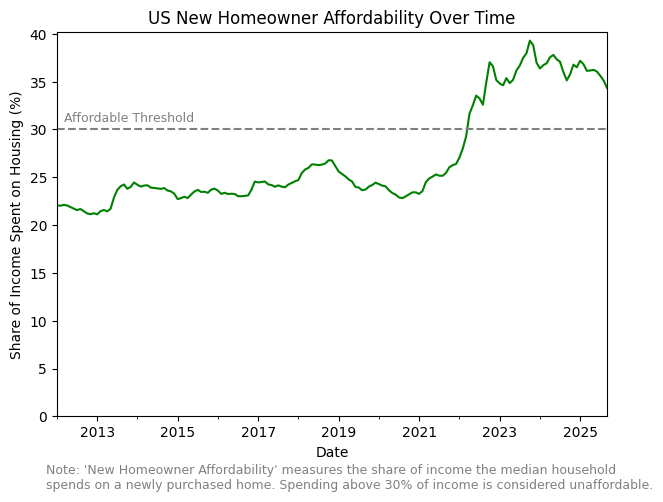

In [17]:
# plot US (overall) housing affordability over time using a line chart
plt.figure(figsize=(8, 5))
# plot line
ax = df_us.plot(
    x='date', y='affordability', kind='line',
    title='US New Homeowner Affordability Over Time',
    color='green')
# add horizontal line at 30%
ax.axhline(y=30, color='grey', linestyle='--')
# add annotation
ax.annotate(
    'Affordable Threshold',
    xy=('2012-03-31', 30), xytext=('2012-03-31', 30.8),
    fontsize=9, color='grey')
# add footnote
plt.figtext(
    0.1, -0.03,
    "Note: 'New Homeowner Affordability' measures the share of income the median household\nspends "
    "on a newly purchased home. Spending above 30% of income is considered unaffordable.",
    fontsize=9, color='grey')
# remove legend
ax.get_legend().remove()
# set axis labels and limits
plt.xlabel('Date')
plt.ylabel('Share of Income Spent on Housing (%)')
plt.tight_layout()
ax.set_ylim(bottom=0)
plt.show()

##### Seaborn

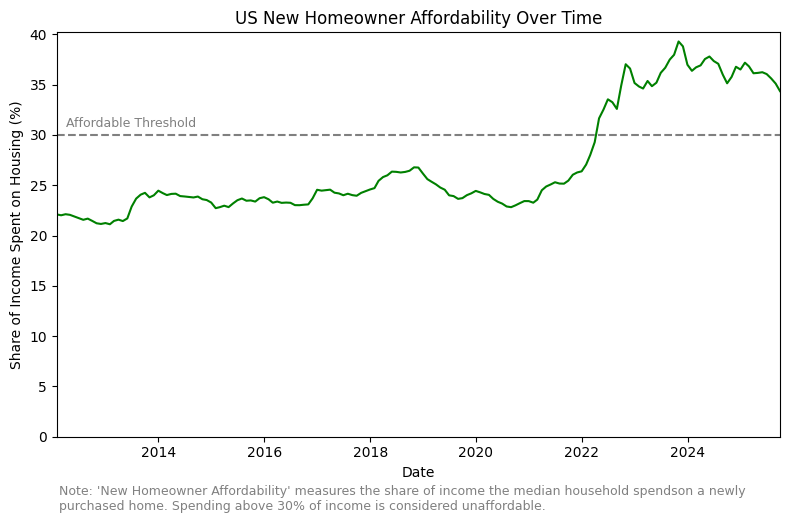

In [19]:
plt.figure(figsize=(8, 5))
# plot line
ax = sns.lineplot(
    data=df_us, x='date', y='affordability',
    color='green', legend=False)
# add horizontal line at 30%
ax.axhline(y=30, color='grey', linestyle='--')
# add annotation
ax.annotate(
    'Affordable Threshold',
    xy=(pd.to_datetime('2012-03-31'), 30),
    xytext=(pd.to_datetime('2012-03-31'), 30.8),
    fontsize=9, color='grey'
)
# add footnote
plt.figtext(
    0.08, -0.03,
    "Note: 'New Homeowner Affordability' measures the share of income the median household spends"
    "on a newly\npurchased home. Spending above 30% of income is considered unaffordable.",
    fontsize=9, color='grey'
)
# set title, axis labels, and limits
plt.title('US New Homeowner Affordability Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Share of Income Spent on Housing (%)')
ax.set_ylim(bottom=0)
ax.set_xlim(df_us['date'].min(), df_us['date'].max())
plt.tight_layout()
plt.show()

#### Median housing affordability over time by region using a line chart
**Showcased Properties**:
- Added horizontal line to represent data benchmark
- Added annotations above the horizontal line and as a footnote
- Updated annotation fontsize and color
- Changed the x and y axis labels
- Updated legend position, title, labels, and fontsize
- Set y axis limit

Matplotlib

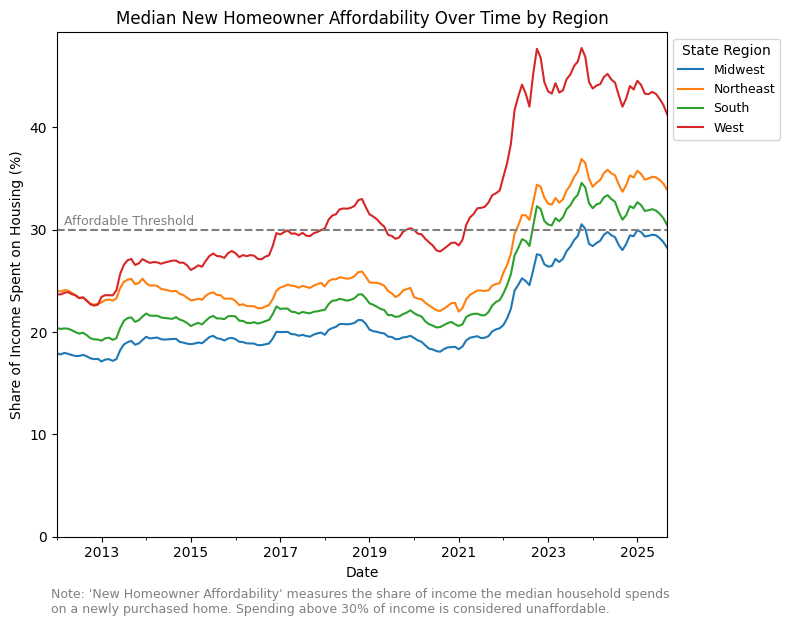

In [20]:
plt.figure(figsize=(8, 6))
ax = region_aff_df.plot(kind='line', ax=plt.gca())
ax.axhline(y=30, color='grey', linestyle='--', label='Threshold')
ax.annotate(
    'Affordable Threshold',
    xy=('2012-03-31', 30), xytext=('2012-03-31', 30.5),
    fontsize=9, color='grey')
plt.figtext(
    0.07, -0.03,
    "Note: 'New Homeowner Affordability' measures the share of income the median household spends\n"
    "on a newly purchased home. Spending above 30% of income is considered unaffordable.",
    fontsize=9, color='grey')
plt.title('Median New Homeowner Affordability Over Time by Region')
plt.xlabel('Date')
plt.ylabel('Share of Income Spent on Housing (%)')
ax.legend(
    title='State Region',
    labels=['Midwest', 'Northeast', 'South', 'West'],
    fontsize=9,
    bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
ax.set_ylim(bottom=0)
plt.show()

Seaborn

/var/folders/bv/45zy4l514vj1rff3l5ncbf4w0000gn/T/ipykernel_55941/1948172087.py:3: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  data=region_aff_df.stack('stateregion').reset_index(),


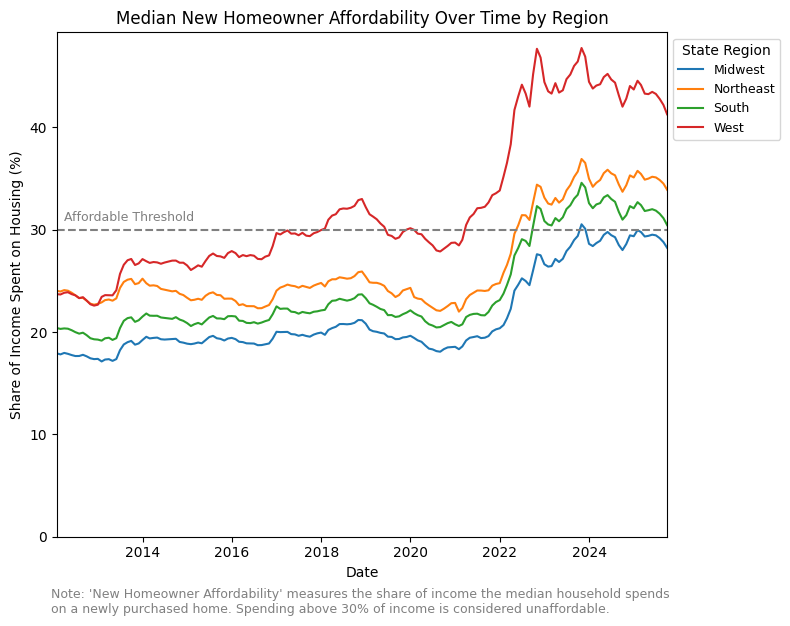

In [21]:
plt.figure(figsize=(8, 6))
ax = sns.lineplot(
    data=region_aff_df.stack('stateregion').reset_index(),
    x='date', y='region_affordability_med',
    hue='stateregion')
ax.axhline(y=30, color='grey', linestyle='--', label='Threshold')
ax.annotate(
    'Affordable Threshold',
    xy=(pd.to_datetime('2012-03-31'), 30),
    xytext=(pd.to_datetime('2012-03-31'), 30.8),
    fontsize=9, color='grey'
)
plt.figtext(
    0.07, -0.03,
    "Note: 'New Homeowner Affordability' measures the share of income the median household spends\n"
    "on a newly purchased home. Spending above 30% of income is considered unaffordable.",
    fontsize=9, color='grey')
plt.title('Median New Homeowner Affordability Over Time by Region')
plt.xlabel('Date')
plt.ylabel('Share of Income Spent on Housing (%)')
handles, labels = plt.gca().get_legend_handles_labels()
ax.legend(
    title='State Region',
    handles=handles[:4],
    labels=labels[:4],
    fontsize=9,
    bbox_to_anchor=(1.0, 1.0)
    )
plt.tight_layout()
ax.set_ylim(bottom=0)
ax.set_xlim(df_state['date'].min(), df_state['date'].max())
plt.show()

#### Average housing affordability percent change difference over time for the best and worst metro area in the last five years
**Showcased Properties**:
- Added horizontal line to represent data benchmark
- Updated annotation fontsize and color
- Changed the x and y axis labels
- Updated legend position, title, labels, and fontsize
- Modified x axis labels to display the year at the beginning of each year

Matplotlib

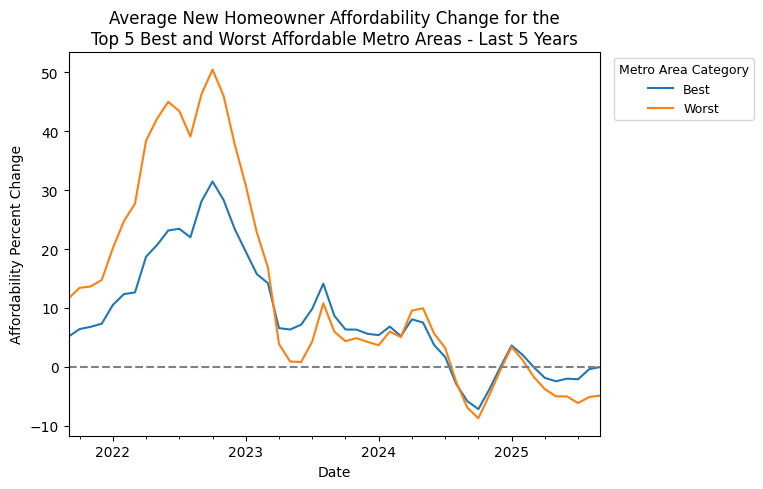

In [22]:
plot_top_low_yoy_avg = top_low_yoy_avg.set_index(['category', 'date']).unstack('category')
plt.figure(figsize=(8, 5))
ax = plot_top_low_yoy_avg.plot(kind='line', ax=plt.gca())
ax.axhline(y=0, color='grey', linestyle='--', label='Threshold')
plt.title('Average New Homeowner Affordability Change for the\nTop 5 Best and Worst Affordable Metro Areas - Last 5 Years')
plt.xlabel('Date')
plt.ylabel('Affordability Percent Change')
ax.legend(
    title='Metro Area Category',
    title_fontsize=9,
    labels=['Best', 'Worst'],
    fontsize=9,
    bbox_to_anchor=(1.3, 1.0))
plt.tight_layout()
plt.show()

Seaborn

/var/folders/bv/45zy4l514vj1rff3l5ncbf4w0000gn/T/ipykernel_55941/3204544413.py:3: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  data=plot_top_low_yoy_avg.stack('category').reset_index(),


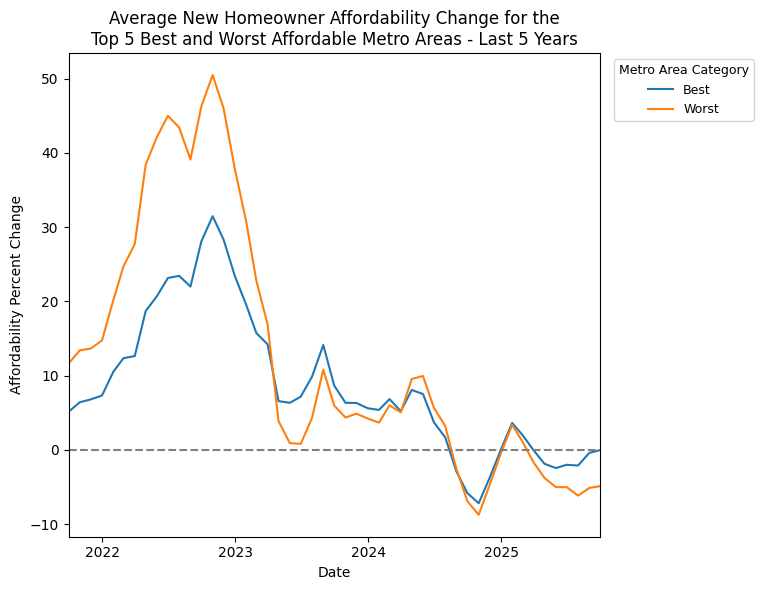

In [23]:
plt.figure(figsize=(8, 6))
ax = sns.lineplot(
    data=plot_top_low_yoy_avg.stack('category').reset_index(),
    x='date', y='yoy_diff',
    hue='category')
ax.axhline(y=0, color='grey', linestyle='--', label='Threshold')
plt.title('Average New Homeowner Affordability Change for the\nTop 5 Best and Worst Affordable Metro Areas - Last 5 Years')
plt.xlabel('Date')
plt.ylabel('Affordability Percent Change')
handles, labels = plt.gca().get_legend_handles_labels()
ax.legend(
    title='Metro Area Category',
    handles=handles[:2],
    labels=labels[:2],
    title_fontsize=9,
    fontsize=9,
    bbox_to_anchor=(1.3, 1.0)
    )
ax.xaxis.set_major_locator(mdates.YearLocator())
date_form = mdates.DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)
plt.tight_layout()
ax.set_xlim(top_low_yoy_avg['date'].min(), top_low_yoy_avg['date'].max())
plt.show()

#### Matplotlib vs Seaborn

Matplotlib is a low-level plotting library that offers full control over every visual element, making it ideal for creating highly customized figures, though it often requires more code and manual setup. Seaborn, built on top of Matplotlib, provides a higher-level interface designed for quick, attractive, and statistically informed visualizations. Seaborn integrates seamlessly with Pandas DataFrames, which is most useful when plotting multi-series plots by group. 

In Matplotlib, you typically need to loop through each group manually, filtering the data and calling plt.plot() for each subset, or ensure the dataframe is indexed correctly by group. Upon plotting the groups in Matpltlob, you then manage colors and legends yourself. In contrast, Seaborn automatically handles grouping through the hue (and optionally style or size) parameters. Thus allowing you to create grouped or multi-series plots in a single line, with distinct colors, a built-in legend, and consistent styling.

Overall, Matplotlib provides full manual control but requires more effort, while Seaborn simplifies grouped plotting by integrating grouping, color palettes, and legends directly into its high-level functions, making it much faster and cleaner for exploratory or comparative visualizations.

***

# Conclusion

Housing affordability has reached an all time low in recent years. The share of income the median household would spend on a newly purchased home across the US exceeded 30%, the threshold for what is considered affordable, around 2023 and has since stayed around 35%. West region states significantly experience the largest gap between income and household income than the other US regions, exceeding the 30% share of income threshold around mid-2021. The Midwest has consistently been the most affordable region and is currently the only region that is below the 30% share of income threshold as of September 2025. The average percent change in affordability has been mostly consistent for the five most affordable and five most unaffordable metro areas in the last 5 years since about mid-2023. Only recently do we see the average percent change for these two groups dip below zero. This could indicate that the gap between household income and price of a newly purchased home will not continue increase and could potentially decline in the coming years.